In [8]:
import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
import numpy as np
import json
import csv
from PIL import Image
from tqdm import tqdm
import string
import time
import matplotlib.pyplot as plt

In [9]:
# load the class label
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

# load ground truth
with open ('../../places365_data/annotations/places365_val.txt','r') as f:
    gts = f.readlines()
gts_x = [i.split()[0][10:-4] for i in gts]
gts_y = [i.split()[1] for i in gts]
gts = {}
for i in range(len(gts_x)):
    gts[gts_x[i]] = int(gts_y[i])
gt = [int(a) for a in list(gts.values())]


def top1_prediction (dt):
#     print(len(dt))
    new_dt = [float(i) for i in dt]
    m = max(new_dt)
#     print(m)
    top1 = [i for i, j in enumerate(new_dt) if j == m]
    return top1

def top1_accuracy(dts,gts):
    total = 0
    accurate = 0
    for key in dts.keys():
        if dts[key] == gts[key]:
            accurate +=1
        total += 1
    return accurate/total


In [10]:
backbone_network = 'resnet50'
with open('val_results_{}.csv'.format(backbone_network),"r") as csvfile:
    reader = csv.reader(csvfile)
    dts = []
    for line in reader:
        dts.append(line)
# print('total {} samples'.format(len(dts)))

dts_top1 = {}
for dt in dts:
    dts_top1[dt[0]] = top1_prediction(dt[1:])[0]

In [26]:
wrong_samples = []
for key in dts_top1.keys():
    if dts_top1[key] == gts[key]:
        pass
    else:
        wrong_samples.append([key,dts_top1[key],gts[key]])
print('there are {} wrong predictions'.format(len(wrong_samples)))

there are 16393 wrong predictions


In [29]:
wrong_samples[0]
print(classes[57],classes[165])

boardwalk greenhouse/indoor


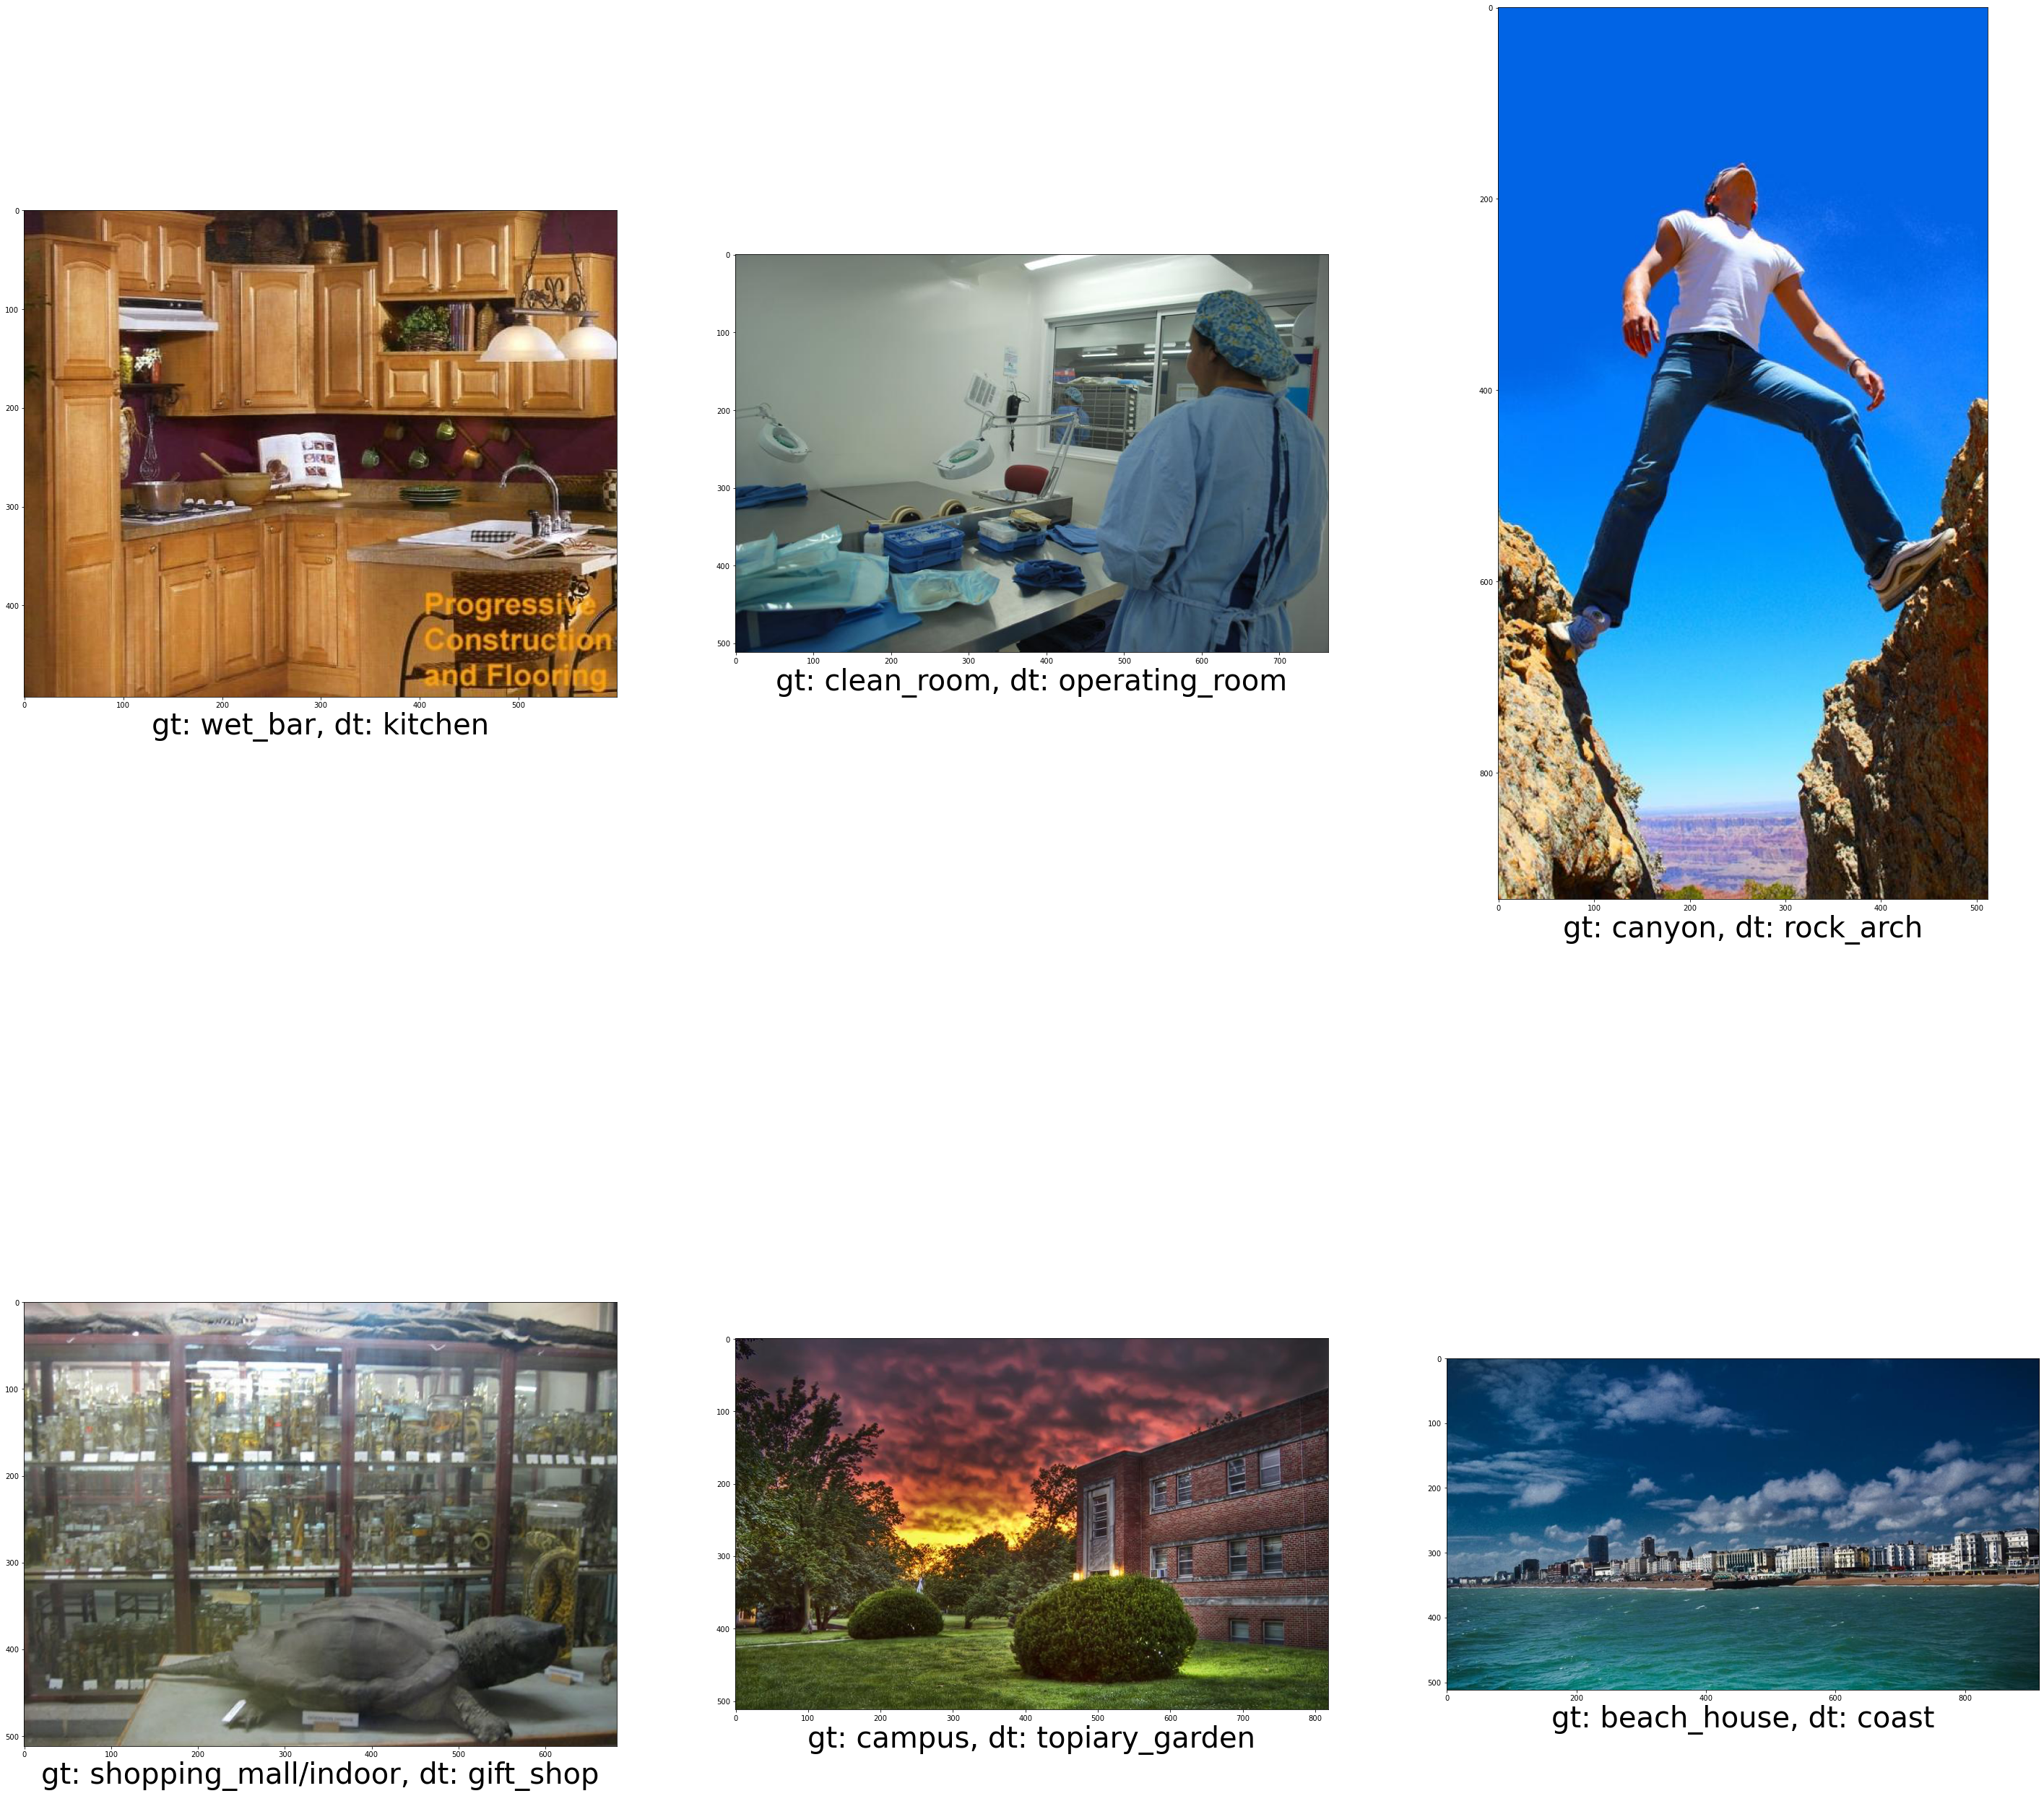

In [31]:
fig=plt.figure(figsize=(50, 50))

columns = 3
rows = 2
for i in range(1, columns*rows +1):
    img_path = '../../places365_data/val_large/Places365_{}.jpg'.format(wrong_samples[i][0])
    image = Image.open(img_path)
    image = np.array(image, dtype=np.uint8)
    ax = fig.add_subplot(rows, columns, i)
    title = 'gt: {}, dt: {}'.format(classes[wrong_samples[i][2]],classes[wrong_samples[i][1]])
    ax.set_xlabel(title, fontsize=40)
#     ax.titlesize: large
#     fig.title.set_text('First Plot')
    plt.imshow(image)
plt.show()